In [1]:
from blackjackenv import BlackjackEnv
import randomagent
# setup blackjack gym environment
import gymnasium


In [2]:
env = BlackjackEnv(sab=True)
agent = randomagent.RandomAgent(env)
env, timesteps_per_episode, wins = randomagent.playNTimes(env, agent, 10000)
print(randomagent.calculate_winrate(env))

100%|██████████| 10000/10000 [00:00<00:00, 12410.89it/s]

0.29


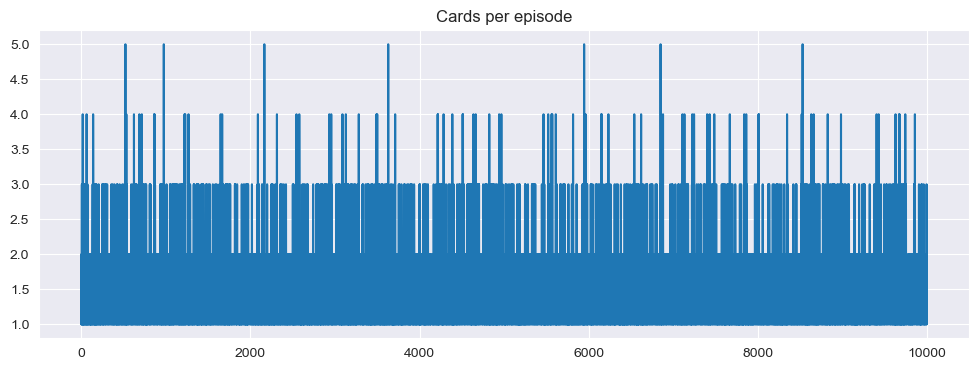

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Cards per episode")
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

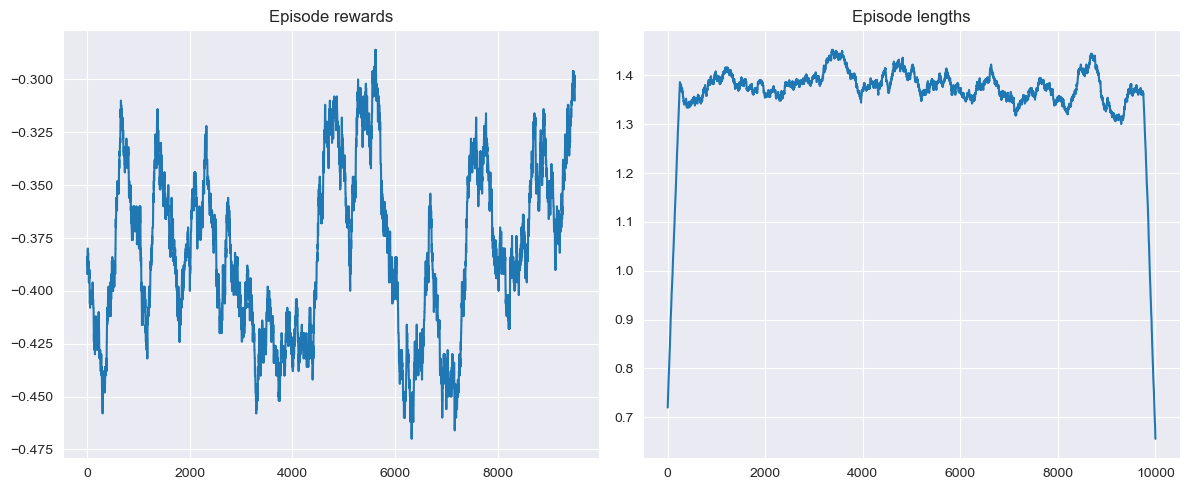

In [4]:
rolling_length = 500
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
plt.tight_layout()
plt.show()